In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


### **1. Import the required packages**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

### **2. Reading and Exploring the Data**

In [ ]:
heart = pd.read_csv('heart.csv')

In [ ]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart.shape

(303, 14)

In [ ]:
heart.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [ ]:
heart.isnull().sum()  #print the total number of missing values column-wise

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
heart.duplicated().sum()  #print the number of duplicate rows present in our data

np.int64(1)

In [ ]:
heart[heart.duplicated()]  #print all the duplicate rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
heart.drop_duplicates(inplace = True)

#### **Checking for the presence of outliers**

In [ ]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
def remove_outlier(data, columns):
  for column in columns:
    if column in data.columns:
      Q1 = data[column].quantile(0.25)
      Q3 = data[column].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR
      data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
  return data

In [ ]:
clean_df = remove_outlier(heart, heart.columns.to_list())

In [ ]:
(302 - 228) / 302

0.24503311258278146

### **Machine Learning Process**

In [ ]:
X = heart.drop(columns = 'target')  #store all the input columns
y = heart['target']  #store the output column

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 300)

### **Apply Decision Tree Classifier on the Data**

In [ ]:
dec_tree = DecisionTreeClassifier(criterion='entropy', max_depth = 7)
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

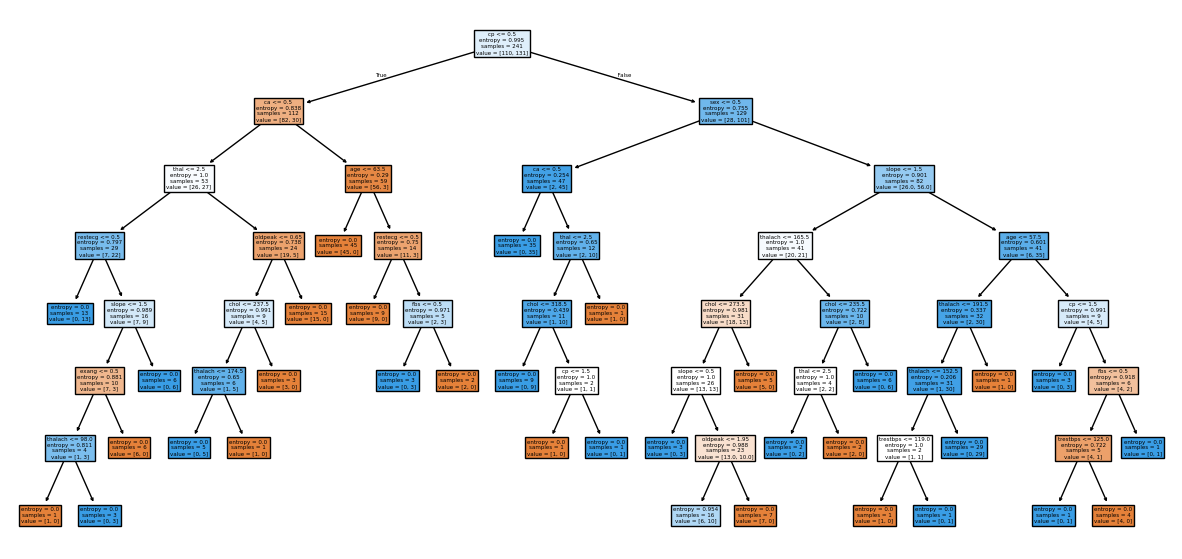

In [ ]:
from sklearn import tree

fig = plt.figure(figsize = (15,7))

#code to print the tree
fig = tree.plot_tree(dec_tree, feature_names = X.columns, filled = True)

In [ ]:
dec_tree.get_depth()

8

In [ ]:
y_pred = dec_tree.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8032786885245902

#### **Check for overfitting in the data**

In [ ]:
y_pred_train = dec_tree.predict(X_train)

In [ ]:
accuracy_score(y_train, y_pred_train)

0.975103734439834